<a href="https://colab.research.google.com/github/tuliofalmeida/pyjama/blob/main/PyJama_Lokomat_exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyJama - Python for Joint Angle Measurement Acquisition Library
##Lokomat example

Joint angle measure using PyJama

This notebook uses an open source project [tuliofalmeida/pyjama](https://pypi.org/project/pyjamalib/) to estimate knee angle using IMU data and video.

In this example we use the joint angle measurement device that we developed coupled to [Lokomat](https://www.hocoma.com/solutions/lokomat/), in order to validate the developed device and the PyJama. In order to compare the findings, we film and extracted the angle using the [Kinovea](https://www.kinovea.org/) software.

IMU aquisition parameters:
*   Frequency: 75 Hz
*   Aquisition duration: 120s

Lokomat parameters: 
*   Min knee angle = 0°
*   Max knee angle = 60°
*   Velocity = 1 km/h

Video details: 
*   Duration: 00:02:58
*   FPS: 30

For other examples and details about the library, visit [Pyjama GitHub](https://github.com/tuliofalmeida/pyjama).

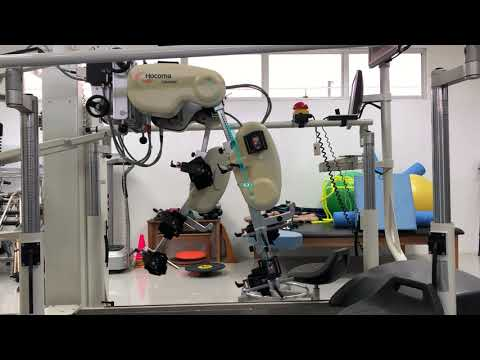

In [ ]:
#@title Video of the lokomat with the sensors
from IPython.display import YouTubeVideo
YouTubeVideo('sve4TcuJmSk',width=640, height=480)

## Install PyJama

In [ ]:
!pip install pyjamalib==0.5.43

     |████████████████████████████████| 51kB 3.9MB/s 


## Import the libraries

In [ ]:
import pyjamalib as pjl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%load_ext google.colab.data_table

## Load the data

In [ ]:
!git clone https://github.com/tuliofalmeida/pyjama

Cloning into 'pyjama'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 168 (delta 68), reused 108 (delta 31), pack-reused 0
Receiving objects: 100% (168/168), 17.96 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
#Lokomat data
path = '/content/pyjama/docs/lokomat/dadoLokomat_Trial_5.txt'
pathTempo = '/content/pyjama/docs/lokomat/dadoTempoLokomat_Trial_5.txt'
data,dt = pjl.DataHandler.import_raw_data(path,pathTempo)

#Lokomat calibration data
path_calib = '/content/pyjama/docs/lokomat/dadoCalib_Lokomat.txt'
pathTempo_calib = '/content/pyjama/docs/lokomat/dadoTempoLokomat_Trial_5.txt'
data_calib,dt_calib = pjl.DataHandler.import_raw_data(path_calib,pathTempo_calib)

#Video data from Kinovea
kinovea = pd.read_csv('/content/pyjama/docs/lokomat/knee_angle_kinovea.csv',delimiter=';')

In [ ]:
#@title Input data example 
print('Data Lokomat: ',data)
print('Data Lokomat Calibration: ',data_calib)
print('Data Kinovea: ',kinovea)

Data Lokomat:  ['', '', '],', '],', '],', '1,-0.023,0.047,0.973,0,6.248,0.385,333.960,-571.320,1503.280;2,-0.023,0.059,0.965,-0.123,6.090,-0.289,334.880,-567.640,1507.880;3,-0.020,0.051,0.949,0.341,6.099,0.236,326.600,-573.160,1506.960;4,-0.027,0.055,0.941,-1.041,5.478,-0.140,327.520,-569.480,1502.360;5,-0.027,0.047,0.953,0.070,5.784,-0.158,328.440,-571.320,1500.520;6,-0.023,0.062,0.961,-0.341,6.116,0.473,335.800,-563.960,1512.480;7,-0.023,0.051,0.977,1.120,5.696,-0.333,335.800,-563.960,1512.480;8,-0.023,0.051,0.953,-0.438,6.344,0.254,328.440,-569.480,1504.200;9,-0.027,0.051,0.953,0.534,5.968,0.070,329.360,-571.320,1504.200;10,-0.023,0.055,0.953,-0.219,5.128,-0.070,334.880,-566.720,1508.800;11,-0.023,0.047,0.961,0.928,6.038,0.009,327.520,-571.320,1502.360;12,-0.027,0.055,0.953,0.333,6.064,-0.053,326.600,-568.560,1502.360;13,-0.020,0.047,0.953,-0.691,6.265,-0.289,330.280,-570.400,1501.440;14,-0.023,0.059,0.957,-1.610,6.501,-0.306,333.960,-567.640,1506.040;15,-0.023,0.055,0.969,-0.928,5.

In [ ]:
#Separating the data from the sensor positioned on the 'thigh'
thigh_data = pjl.DataHandler.split_raw_data(data[6])
thigh_calibration = pjl.DataHandler.split_raw_data(data_calib[6])

#Separating the data from the sensor positioned on the 'shank'
shank_data = pjl.DataHandler.split_raw_data(data[5])
shank_calibration = pjl.DataHandler.split_raw_data(data_calib[5])

## Performing data processing. The 'toDataFrame' function performs the filtering of the data and saves it in a pandas data frame.

In [8]:
#Processing 'thigh' sensor data
#The data was cut [500:] due to the equipment being stopped to adjust the equipment and adjust the filter delay.
thigh_df = pjl.DataProcessing.toDataframe(thigh_data[500:],thigh_calibration,beta=1,alpha=0.01,beta_mag2=.6)
thigh_df.head()

,Time,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Acc_X_Filt,Acc_Y_Filt,Acc_Z_Filt,Gyr_X_Filt,Gyr_Y_Filt,Gyr_Z_Filt,Mag_X_Filt,Mag_Y_Filt,Mag_Z_Filt,Roll,Pitch,Yaw,CF_Roll,CF_Pitch,CF_Yaw,CF_GD_Roll,CF_GD_Pitch,CF_GD_Yaw,CF_GN_Roll,CF_GN_Pitch,CF_GN_Yaw,Kalman_GD_Roll,Kalman_GD_Pitch,Kalman_GD_Yaw,Kalman_GN_Roll,Kalman_GN_Pitch,Kalman_GN_Yaw,Madgwick_Roll,Madgwick_Pitch,Madgwick_Yaw
0,0.000000,-0.004704,0.998939,-0.007155,-0.001252,0.000740,-0.002086,-197.80,-64.40,172.04,-0.004704,0.998939,-0.007155,-0.001252,0.000740,-0.002086,-197.800000,-64.400000,172.040000,0.000000,-0.000000,0.000000,-0.000016,0.000009,-0.000026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.171592,-1.219836,162.871759
1,0.013333,0.002296,0.994939,-0.007155,0.001506,0.000898,0.006170,-197.80,-64.40,172.04,-0.004424,0.998779,-0.007155,-0.001142,0.000747,-0.001755,-197.800000,-64.400000,172.040000,47.298268,37.630015,-37.447709,2.364884,1.881519,-1.872433,0.111087,0.126167,0.024274,96.915858,26.499889,129.275061,0.183789,0.208819,0.040375,96.626937,26.838104,128.853912,122.678397,-1.165518,162.723723
2,0.026667,-0.000704,0.994939,0.000845,0.000284,0.003341,0.003255,-219.88,-49.68,149.04,-0.004275,0.998625,-0.006835,-0.001085,0.000850,-0.001555,-198.683200,-63.811200,171.120000,47.295731,37.627005,-37.446219,4.611412,3.668804,-3.651142,0.215058,0.243968,0.047172,88.961427,1.915378,139.344607,0.271850,0.309542,0.060753,93.285973,14.233813,133.807031,122.151058,-1.130725,162.631404
3,0.040000,-0.004704,1.006939,0.004845,-0.009193,-0.000935,0.004337,-218.96,-51.52,149.96,-0.004292,0.998958,-0.006367,-0.001409,0.000779,-0.001319,-199.494272,-63.319552,170.273600,46.738195,39.182209,-38.308273,6.717734,5.444484,-5.384015,0.319323,0.361868,0.070335,90.188606,0.453864,139.623936,0.365580,0.416778,0.082610,92.397506,9.611480,135.690102,121.617757,-1.089918,162.532097
4,0.053333,0.002296,0.998939,0.004845,0.008836,0.000740,0.004180,-209.76,-51.52,156.40,-0.004029,0.998957,-0.005919,-0.000999,0.000778,-0.001099,-199.904901,-62.847570,169.718656,46.901806,39.367114,-38.409602,8.726925,7.140626,-7.035308,0.403373,0.456783,0.089137,90.317885,0.256597,139.767473,0.458997,0.523656,0.104626,91.934055,7.256927,136.691838,121.113984,-1.048268,162.399176


In [9]:
#Processing 'shank' sensor data
#The data was cut [500:] due to the equipment being stopped to adjust the equipment and adjust the filter delay. 
shank_df = pjl.DataProcessing.toDataframe(shank_data[500:],shank_calibration,beta=1,alpha=0.01,beta_mag2=.6)
shank_df.head()

,Time,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Acc_X_Filt,Acc_Y_Filt,Acc_Z_Filt,Gyr_X_Filt,Gyr_Y_Filt,Gyr_Z_Filt,Mag_X_Filt,Mag_Y_Filt,Mag_Z_Filt,Roll,Pitch,Yaw,CF_Roll,CF_Pitch,CF_Yaw,CF_GD_Roll,CF_GD_Pitch,CF_GD_Yaw,CF_GN_Roll,CF_GN_Pitch,CF_GN_Yaw,Kalman_GD_Roll,Kalman_GD_Pitch,Kalman_GD_Yaw,Kalman_GN_Roll,Kalman_GN_Pitch,Kalman_GN_Yaw,Madgwick_Roll,Madgwick_Pitch,Madgwick_Yaw
0,0.000000,0.007029,1.008011,-0.001771,-0.013940,-0.004155,-0.002551,190.90,-118.68,1279.72,0.007029,1.008011,-0.001771,-0.013940,-0.004155,-0.002551,190.900000,-118.680000,1279.720000,0.000000,-0.000000,0.000000,-0.000177,-0.000053,-0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.202450,-0.959851,79.644378
1,0.013333,0.003029,1.000011,-0.001771,-0.051342,0.005758,0.004780,192.74,-122.36,1288.92,0.006869,1.007691,-0.001771,-0.015436,-0.003759,-0.002258,190.973600,-118.827200,1280.088000,4.183872,-5.215768,38.789078,0.208830,-0.260886,1.939395,1.225093,0.032660,0.024853,72.885372,7.656272,68.525777,3.209541,0.120420,0.083068,72.585200,7.820683,68.246436,92.431073,-0.829464,80.046818
2,0.026667,0.003029,1.012011,-0.009771,-0.013015,0.003786,-0.001800,187.22,-124.20,1275.12,0.006716,1.007863,-0.002091,-0.015339,-0.003457,-0.002239,190.823456,-119.042112,1279.889280,4.183292,-5.219160,38.789274,0.407359,-0.508843,3.781860,2.436336,0.082749,0.058245,88.172130,-0.669287,81.499440,4.930052,0.208985,0.230644,80.564285,3.893071,76.053202,91.723147,-0.648496,80.595722
3,0.040000,0.003029,1.012011,0.010229,-0.011182,0.003926,0.006455,184.46,-123.28,1276.04,0.006568,1.008029,-0.001598,-0.015173,-0.003162,-0.001892,190.568918,-119.211628,1279.735309,4.701435,-7.540515,52.457447,0.621871,-0.860467,6.215616,3.624867,0.151336,0.101290,89.850802,-0.409222,81.496138,6.687236,0.242560,0.582317,83.497058,2.320514,78.879233,90.978289,-0.539187,80.946798
4,0.053333,0.007029,0.992011,-0.001771,-0.020188,0.003018,0.013942,189.98,-119.60,1279.72,0.006587,1.007389,-0.001605,-0.015374,-0.002915,-0.001258,190.545361,-119.227162,1279.734696,4.696132,-7.533265,52.389281,0.825389,-1.194144,8.524283,4.816620,0.240830,0.156557,90.061238,-0.379108,81.495592,8.479442,0.189147,1.233551,84.856106,1.368696,80.328100,90.224014,-0.481698,81.407419


In [ ]:
#Processing the video data
data_kinovea = np.asarray([float(kinovea['Knee Angle'][i].replace(',', '.')) for i in range(len(kinovea['Knee Angle']))])
time_kinovea = np.arange(0, len(data_kinovea)/30, 1/30)

## The 'joint_angle' function merges the data, extracts statistical metrics and saves them in a pandas data frame.

In [24]:
#The data was cut [init=1500] due to filters and gait patterns. 
knee_angle,knee_metrics = pjl.DataProcessing.joint_measures(thigh_df,shank_df,patternRoll=True,init=1500)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [12]:
#@title Knee joint data from IMU { vertical-output: true }
knee_angle

,Time,Flex/Ext,Adu/Abd,Int/Ext_Rot,Flex/Ext_CF,Adu/Abd_CF,Int/Ext_Rot_CF,Flex/Ext_CF_GD,Adu/Abd_CF_GD,Int/Ext_Rot_CF_GD,Flex/Ext_CF_GN,Adu/Abd_CF_GN,Int/Ext_Rot_CF_GN,Flex/Ext_Kalman_GD,Adu/Abd_Kalman_GD,Int/Ext_Rot_Kalman_GD,Flex/Ext_Kalman_GN,Adu/Abd_Kalman_GN,Int/Ext_Rot_Kalman_GN,Flex/Ext_Madgwick,Adu/Abd_Madgwick,Int/Ext_Rot_Madgwick
1500,20.000000,117.887713,8.042020,307.450934,34.250739,11.148299,246.770583,48.136801,2.997053,6.332818,47.438343,3.460526,5.813076,62.349711,13.066420,15.889406,61.378274,7.850794,10.466621,57.267847,3.822899,16.355787
1501,20.013333,119.262880,7.803705,309.707367,34.728656,10.916865,248.211322,49.088090,3.008177,6.228694,48.356668,3.408085,5.753752,62.962918,12.455998,14.282371,61.903510,7.753171,10.028017,56.341849,3.597678,16.293028
1502,20.026667,117.956036,7.695325,310.210223,35.116698,10.691576,249.605117,49.984406,3.015074,6.134857,49.232730,3.360101,5.694657,63.401775,12.230003,13.828876,62.381075,7.659687,9.620769,55.332054,4.108286,16.579219
1503,20.040000,119.278469,7.565923,311.299104,35.550810,10.471088,250.983652,50.830797,2.993309,6.073726,50.042871,3.315651,5.633092,64.590248,11.673332,10.245693,62.784804,7.581531,9.193412,54.638865,4.783415,16.523539
1504,20.053333,118.011182,7.397742,313.064155,35.899175,10.253219,252.381501,51.611739,2.960513,6.012139,50.808759,3.272573,5.571932,64.444444,11.649117,11.723457,63.145107,7.506525,8.784194,53.568399,4.472698,16.447021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,113.266667,127.911124,9.302387,292.888541,33.692751,11.883929,230.841598,42.459201,1.389151,6.542220,41.708406,1.895487,6.015511,53.451285,9.114130,21.566736,53.022656,4.957778,17.251955,62.423175,3.603743,16.523515
8496,113.280000,117.082631,8.711769,300.538028,34.092601,11.661229,232.620481,43.614415,1.355431,6.467936,42.883144,1.845427,5.978204,55.332626,8.479094,17.655474,54.093943,5.049866,16.437743,62.146210,3.615264,16.430555
8497,113.293333,127.912479,8.921561,294.347073,35.013440,11.460172,234.000858,44.770899,1.315346,6.436864,44.016798,1.795956,5.939965,55.243242,9.023977,20.652395,55.091084,5.156306,15.720008,61.581362,3.528296,16.341206
8498,113.306667,117.166976,8.381224,302.340873,35.350424,11.242155,235.711874,45.864407,1.277504,6.396265,45.107392,1.748784,5.900301,56.859691,8.605324,17.349207,56.009355,5.259030,15.077436,60.943902,3.504336,16.257038


In [25]:
knee_rom = pjl.DataProcessing.joint_rom(knee_angle)

In [14]:
#@title Knee Range of Motion from IMU
knee_rom.head()

,Angles
Flex/Ext,130.116319
Adu/Abd,28.599838
Int/Ext_Rot,374.739861
Flex/Ext_CF,47.948576
Adu/Abd_CF,16.456611


In [26]:
#@title Knee metrics from IMU
knee_metrics

,Movement,Rom,Mean,Std,CI,Var,Min,Max,Min Est,Max Est
0,Flex/Ext,130.116319,35.867609,21.162239,41.477988,447.840340,0.0,130.116319,99.446670,117.518130
1,Flex/Ext_CF,47.948576,38.442215,5.942984,11.648249,35.319059,0.0,47.948576,10.108463,45.230272
2,Flex/Ext_CF_GD,62.921719,53.322237,2.534618,4.967851,6.424288,0.0,62.921719,5.227079,58.415574
3,Flex/Ext_CF_GN,62.072629,53.143335,2.653324,5.200515,7.040129,0.0,62.072629,4.740410,57.727221
4,Flex/Ext_Kalman_GD,70.907296,58.808791,2.899372,5.682770,8.406360,0.0,70.907296,7.358088,63.600011
5,Flex/Ext_Kalman_GN,69.144001,56.806202,2.809367,5.506359,7.892542,0.0,69.144001,6.116024,61.713590
6,Flex/Ext_Madgwick,65.925118,58.281918,2.751705,5.393342,7.571882,0.0,65.925118,4.482209,58.575906


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


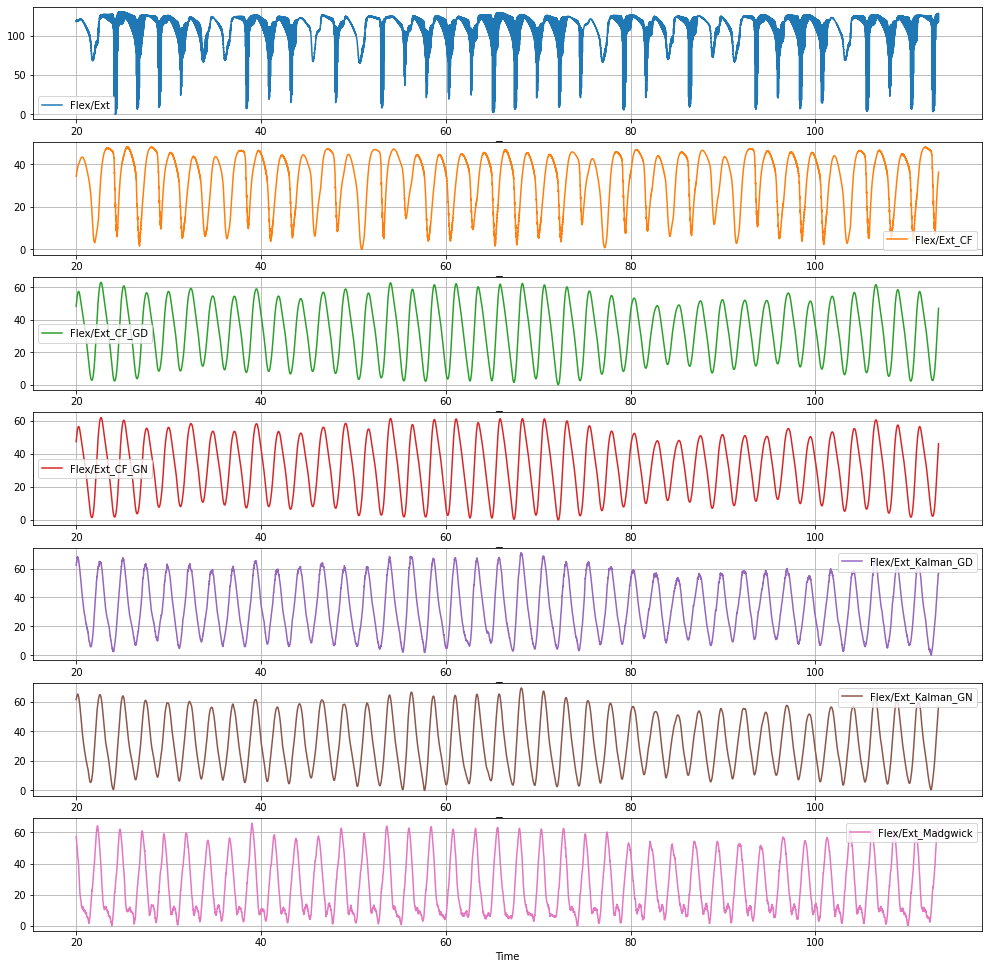

In [27]:
#@title Knee angle plots from IMU
def df_plot(df,x_axis,y_axis,color=None,graph_type='line',subplots=False,grid=True,layout=None,size=(17,17)):
    plt.figure(figsize=size)
    ax = plt.gca()
    df.plot(kind=graph_type,x=x_axis,y=y_axis,ax=ax,color=color,layout=layout,subplots=subplots,grid=grid)
    plt.legend(loc='upper right')
    plt.show()

filters = ['Flex/Ext','Flex/Ext_CF','Flex/Ext_CF_GD','Flex/Ext_CF_GN',
           'Flex/Ext_Kalman_GD','Flex/Ext_Kalman_GN','Flex/Ext_Madgwick']
           
df_plot(knee_angle,'Time',filters,graph_type='line',subplots=True)

In [28]:
#@title Knee angle from video
kinovea.head()

,Time (ms),Knee Angle
0,0,"5,05740165710449"
1,33,"5,09946489334106"
2,67,"5,1323094367981"
3,100,"5,15325403213501"
4,133,"5,16673707962036"


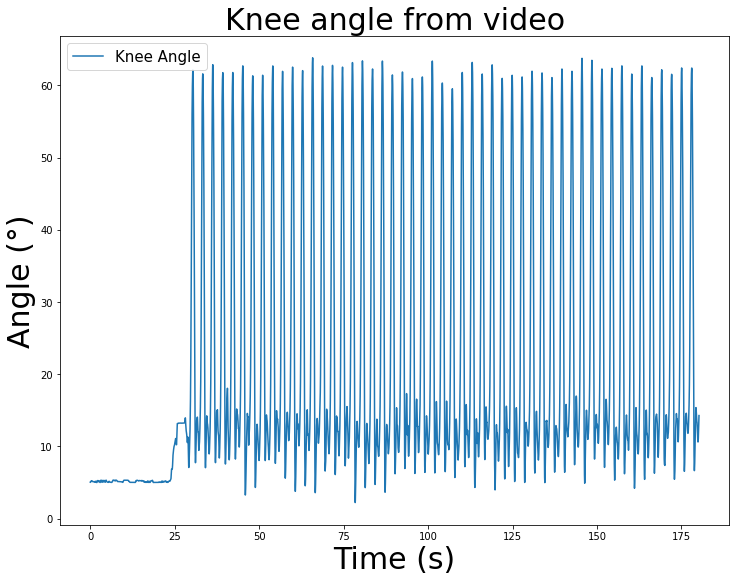

In [29]:
#@title Knee angle from video
plt.figure(figsize=(12,9))
plt.plot(time_kinovea,data_kinovea)
plt.title('Knee angle from video',fontsize = 30);
plt.legend(['Knee Angle'], fontsize = 15)
plt.ylabel('Angle (°)',fontsize = 30);
plt.xlabel('Time (s)',fontsize = 30);

## Finding the gait cicle

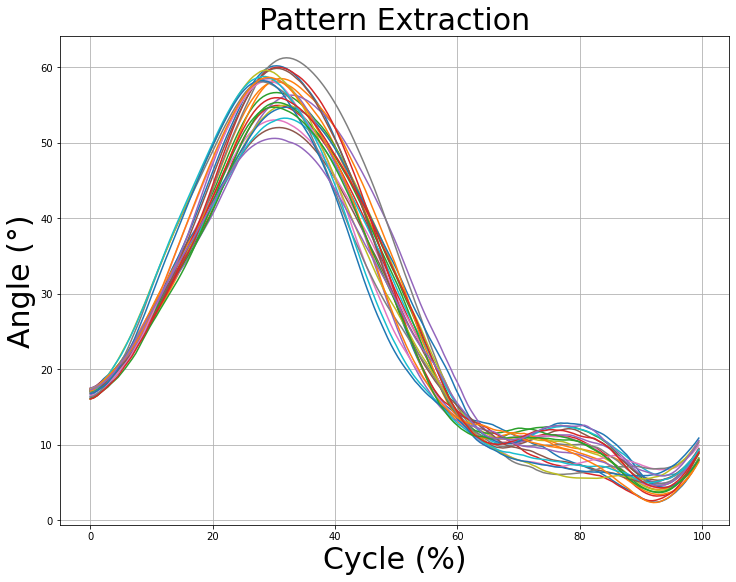

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [30]:
#Gait pattern from IMU
imu_cycle,_ = pjl.DataProcessing.pattern_extraction(knee_angle['Flex/Ext_Madgwick'],knee_angle['Time'],threshold=17.5,plot=True,bias=1);

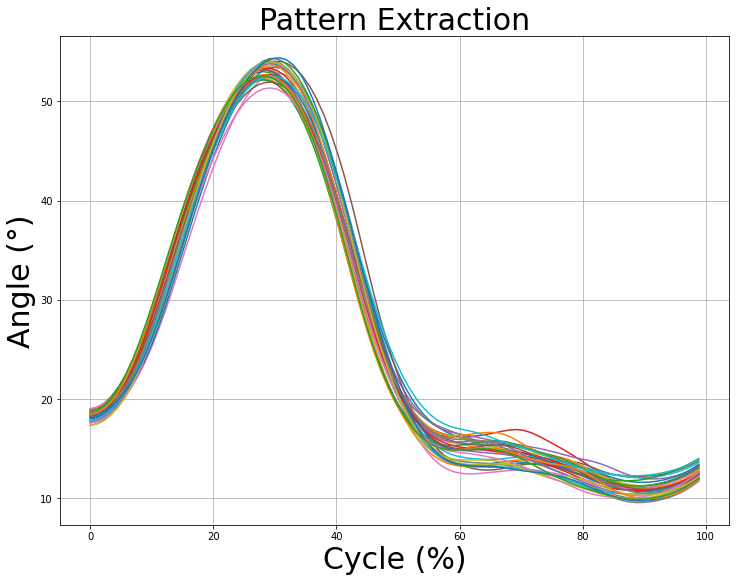

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [31]:
#Gai pattern from video
video_cycle,_ = pjl.DataProcessing.pattern_extraction(data_kinovea,time_kinovea,threshold=19,plot=True,df=False)

## Average cycles with 95% CI

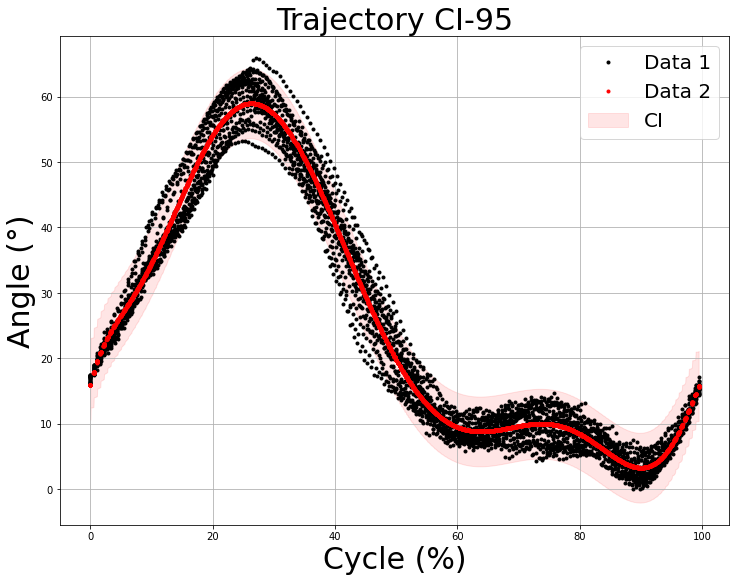

In [32]:
#IMU average cycles
imu_pattern = pjl.DataProcessing.patternCI(imu_cycle[:,0],imu_cycle[:,1],plot=True,df=False, poly_degree=10)

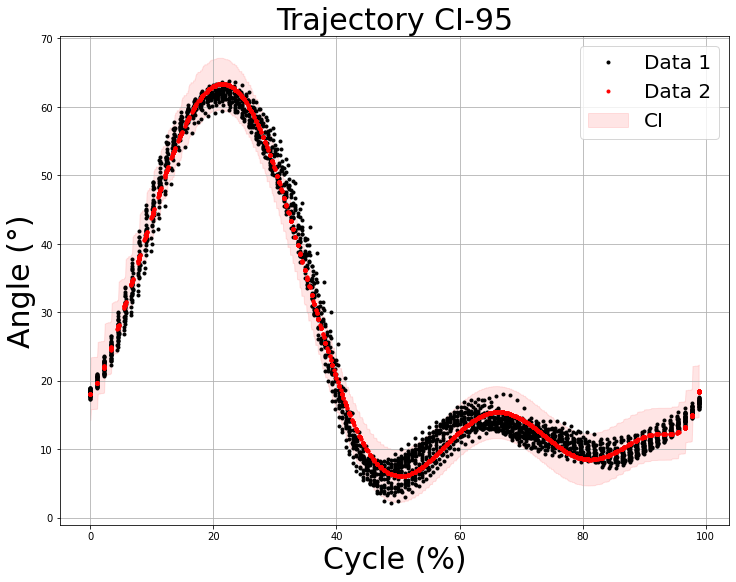

In [33]:
#Video average cycles
video_pattern = pjl.DataProcessing.patternCI(video_cycle[:,0],video_cycle[:,1],plot=True,df=False, poly_degree=10)

## Data comparsion: IMU x Video

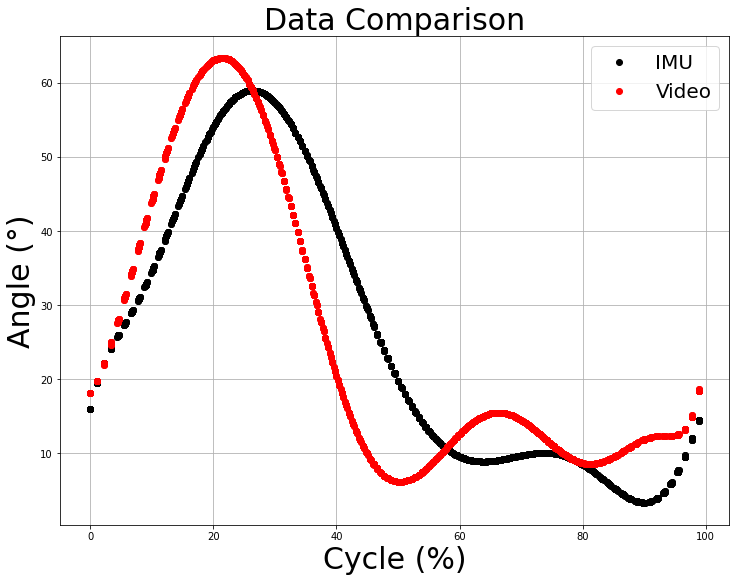

In [34]:
imu_mean,video_mean = pjl.DataProcessing.data_comparison(video_cycle,imu_pattern,video_pattern,label1='IMU',label2='Video')